In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# file path
data_dir = "C:/Users/John/PycharmProjects/Gradient_Descent_Optimisation_Technique/data/"

In [26]:
# loading the independent variable
with open(data_dir+"train.npy", "rb") as fin:
    X = np.load(fin)
    
# loading the target variable
with open(data_dir+"target.npy", "rb") as fin:
    y = np.load(fin)

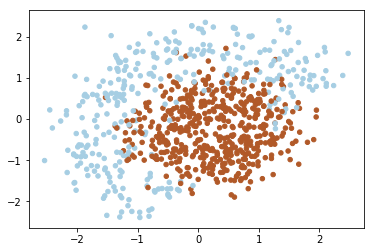

In [27]:
# take a look at the data using a scatter plot
#sns.scatterplot(X[:,0], X[:,1], hue=y, style=y);
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap = plt.cm.Paired);
plt.show()

In [28]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    #X_expanded = np.zeros((X.shape[0], 6))
    X_expanded = np.concatenate((X, X[:,0:1]**2, X[:,1:2]**2, X[:,0:1]*X[:,1:2], np.ones((X.shape[0], 1))), axis=1)
    return X_expanded                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [29]:
X_expanded = expand(X)

In [30]:
# Just to check if the function works as expected.
dummy_X = np.array([
    [0,0],
    [1,0],
    [2.61,-1.28],
    [-0.59,2.1]
])

dummy_expanded = expand(dummy_X)

dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

assert isinstance(dummy_expanded, np.ndarray)
assert dummy_expanded.shape == dummy_expanded_ans.shape, "Please make sure the shape of your matrix is correct"
assert np.allclose(dummy_expanded, dummy_expanded_ans, 1e-3), "Something's out of order with features"

# Logisitic Regression

In [31]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """
    return (1/ (1 + np.exp(np.matmul(X, w) * -1)))

In [ ]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """

    probs = []
    for row in range(X.shape[0]):
        probs.append(probability(X[row, :], w))

    loss = 0
    for idx, res_val in enumerate(y):
        loss += -((res_val * np.log(probs[idx])) + ((1 - res_val) * np.log(1 - probs[idx])))

    return (loss / len(y))

In [ ]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    m = X.shape[0] # num of rows in the dataset

    gradient = np.zeros((X.shape[1]))
    for idx in range(X.shape[1]):
        temp_grad = 0
        for idx_1, res_val in enumerate(y):
            # gradient of one parameter is calculated in one flow
            temp_grad += (res_val - probability(X[idx_1,:],w))*(X[idx_1, idx])
        gradient[idx] = -1 * (1/m) * temp_grad
    return gradient

In [46]:
from IPython import display

h = 0.01 #learning rate
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

In [48]:
dummy_weights = np.linspace(-1, 1, 6)

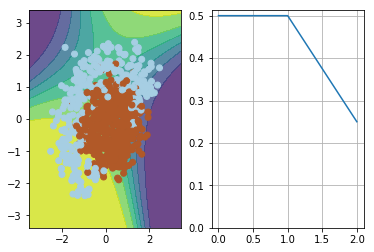

In [49]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])